<a href="https://colab.research.google.com/github/felixn95/oil-palm-detection/blob/main/data_processing/preprocessing_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing & Explorative Data Analysis (EDA)

In [1]:
!pip install data-gradients --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.5/459.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.2/433.2 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
import data_gradients
import torchvision

That all the team members & others have access to the dataset without kaggle api, we also hosted it on Github (LFS)

In [3]:
# load data set & unzip

!wget https://github.com/felixn95/tds_project/raw/main/wisdatathon2019.zip

--2024-01-30 17:43:45--  https://github.com/felixn95/tds_project/raw/main/wisdatathon2019.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/felixn95/tds_project/main/wisdatathon2019.zip [following]
--2024-01-30 17:43:45--  https://media.githubusercontent.com/media/felixn95/tds_project/main/wisdatathon2019.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 483449080 (461M) [application/zip]
Saving to: ‘wisdatathon2019.zip’

wisdatathon2019.zip 100%[===================>] 461.05M   189MB/s    in 2.4s    

2024-01-30 17:43:56 (189 MB/s) - ‘wisdatathon2019.zip’ saved [483449080

Inside the provided zip file, there are two more zip files to extract (train and validation images)

In [4]:
!unzip -q wisdatathon2019.zip

In [5]:
!unzip -q wisdatathon2019/train_images.zip
!unzip -q wisdatathon2019/leaderboard_test_data.zip

Let's define some paths, to have a clear distinction where all necessary images and labels are located inside the colab runtime.

In [6]:
train_images = '/content/train_images'
test_images =  '/content/leaderboard_test_data'
train_labels = '/content/wisdatathon2019/traininglabels.csv'
test_labels = '/content/wisdatathon2019/testlabels.csv'

While trying to work with the dataset, we noticed that labeled images in the labels csv's do not fit to the image ids. It was necessary to remove the year at the end of the string in each row to have consistency.

In [7]:
import pandas as pd

def adjust_image_ids(input_csv_path, output_csv_path):

    df = pd.read_csv(input_csv_path)

    # Modify the 'image_id' column
    df['image_id'] = df['image_id'].str.replace(r'\d{4}\.jpg', '.jpg', regex=True)

    # Save to the output CSV file
    df.to_csv(output_csv_path, index=False)


adjust_image_ids(train_labels, 'traininglabels_processed.csv')
adjust_image_ids(test_labels, 'testlabels_processed.csv')

train_labels = '/content/traininglabels_processed.csv'
test_labels = '/content/testlabels_processed.csv'

Further, there are some image_ids listed in the labels csv, but not existing in the image folders. This would lead to errors when loading the data while training, so we removed all missing entities from the lists.

In [8]:
import os

def filter_missing_images(csv_file, image_dir, target_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Filter out rows where the image file does not exist
    df_filtered = df[df['image_id'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]

    # Save the filtered DataFrame
    df_filtered.to_csv(target_file, index=False)

filter_missing_images(train_labels, train_images, '/content/train_labels_filtered.csv')
filter_missing_images(test_labels, test_images, '/content/test_labels_filtered.csv')

train_labels = '/content/train_labels_filtered.csv'
test_labels = '/content/test_labels_filtered.csv'



Now the data is prepared to use the Data Gradients Library to get some insights and to explore the data: https://docs.deci.ai/data-gradients/index.html

  - Executing analysis with: 
  - batches_early_stop: None 
  - len(train_data): 236 
  - len(val_data): 56 
  - log directory: /content/logs/Oil_Palm_Plantation_Classification_Analysis 
  - Archive directory: /content/logs/Oil_Palm_Plantation_Classification_Analysis/archive_20240130-174442 
  - feature extractor list: {'Image Features': [ClassificationSummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Classification Features': [ClassificationClassFrequency, ClassificationClassDistributionVsArea]}
╔══════════════════════════════════════════════════════════════════════════╗
║  To better understand how to tackle the data issues highlighted in this  ║
║  report, explore our comprehensive course on analyzing computer vision   ║
║  datasets. click here: https://hubs.ly/Q01XpHBT0                         ║
╚══════════════════════════════════════════════════════════════════════════╝


Analyzing... :   0%|          | 0/236 [00:00<?, ?it/s]


--------------------------------------------------------------------------------
In which format are your images loaded ?
--------------------------------------------------------------------------------

Options:
[0] | RGB
[1] | BGR
[2] | LAB
[3] | Other

Your selection (Enter the corresponding number) >>> 0
Great! You chose: `RGB`


Analyzing... : 15057it [02:11, 114.25it/s]
Summarizing... : 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...

Your dataset evaluation has been completed!

----------------------------------------------------------------------------------------------------
Training Configuration...
`ClassificationDataConfig` cache is not enabled because `cache_path=None` was not set.

----------------------------------------------------------------------------------------------------
Report Location:
    - Temporary Folder (will be overwritten next run):
        └─ /content/logs/Oil_Palm_Plantation_Classification_Analysis
                ├─ Report.pdf
                └─ summary.json
    - Archive Folder:
        └─ /content/logs/Oil_Palm_Plantation_Classification_Analysis/archive_20240130-174442
                ├─ Report.pdf
                └─ summary.json

Seen a glitch? Have a suggestion? Visit https://github.com/Deci-AI/data-gradients !


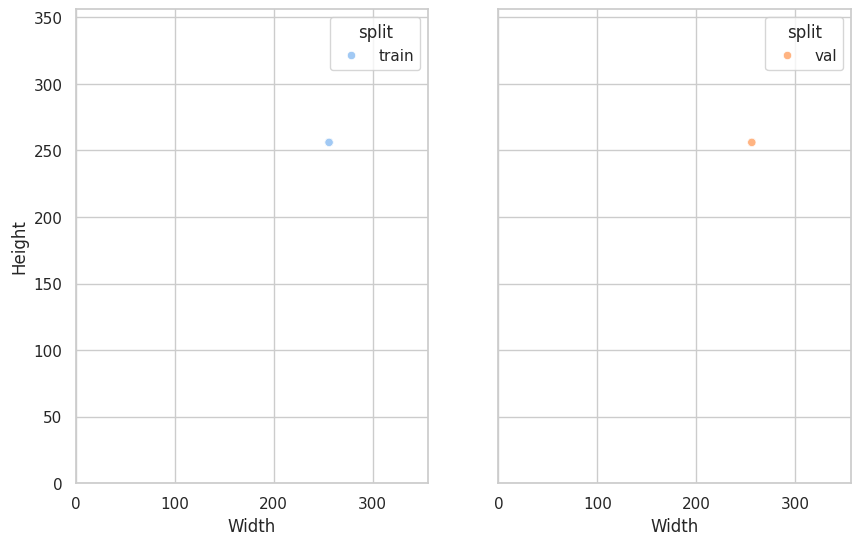

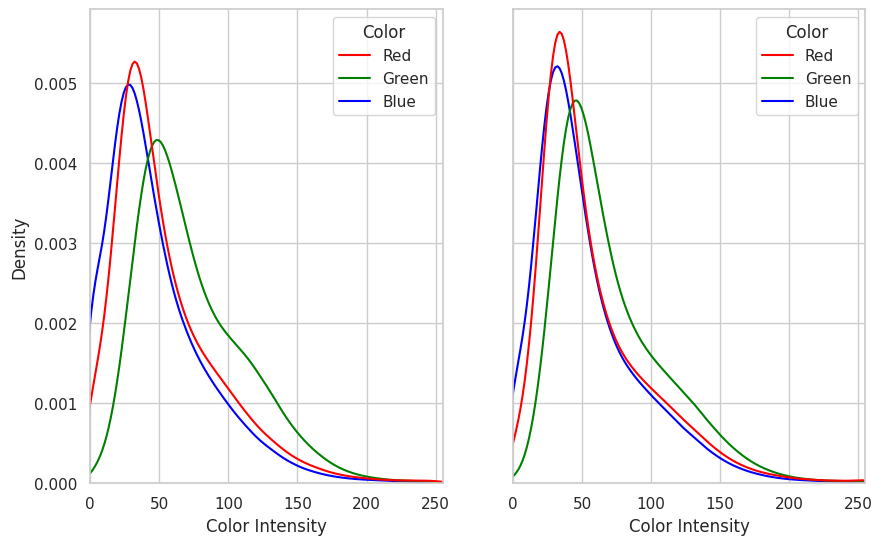

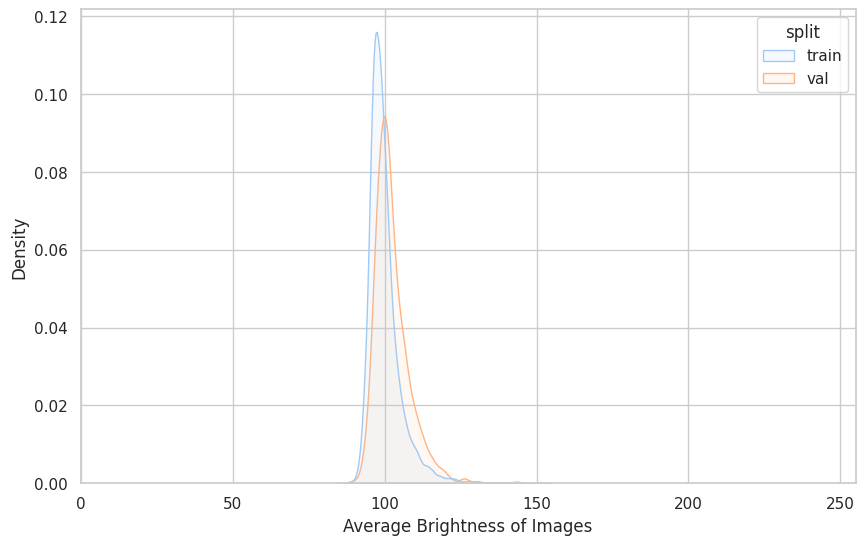

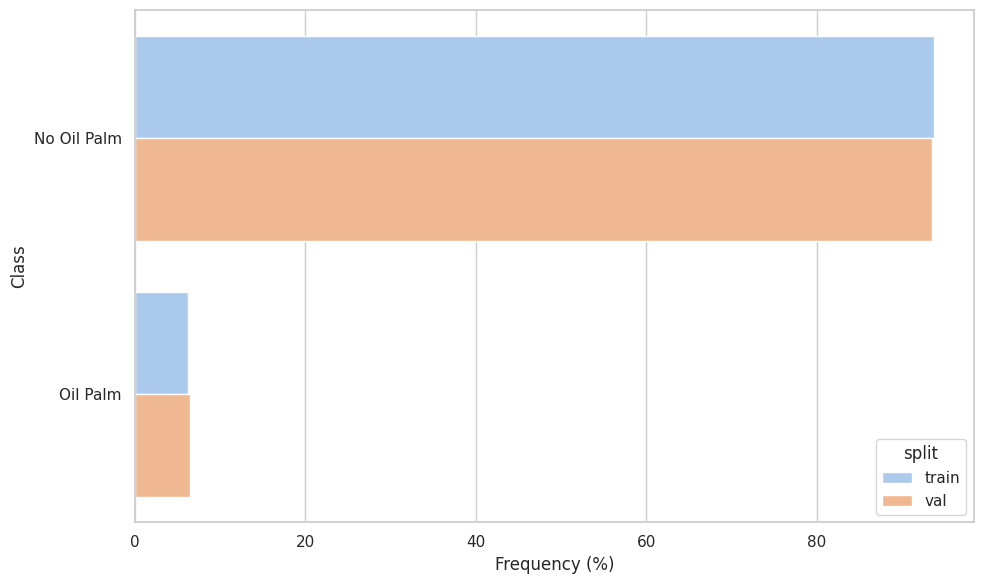

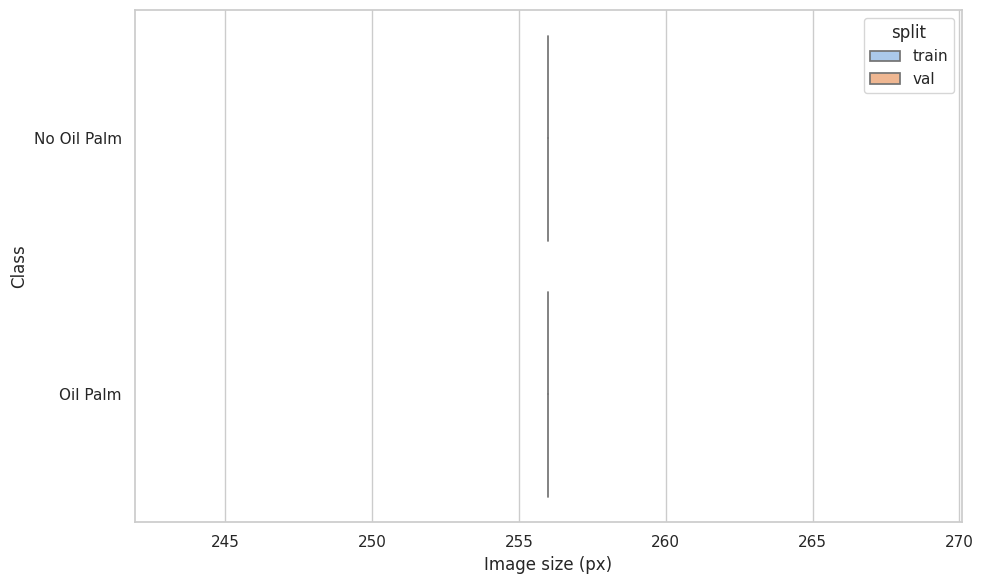

In [9]:
from data_gradients.managers.classification_manager import ClassificationAnalysisManager
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# create a specific class to use it in the Dataloader

class OilPalmDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.labels.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Create the datasets
train_dataset = OilPalmDataset(csv_file=train_labels,
                               root_dir=train_images,
                               transform=transform)

val_dataset = OilPalmDataset(csv_file=test_labels,
                             root_dir=test_images,
                             transform=transform)

# Create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Class names
class_names = ['No Oil Palm', 'Oil Palm']

# Create an Analyzer
analyzer = ClassificationAnalysisManager(
    report_title="Oil Palm Plantation Classification Analysis",
    train_data=train_loader,
    val_data=val_loader,
    class_names=class_names,
)

analyzer.run()


As to see in the Data Gradients Report, the train & test set is balanced and all images are of size 256. Further, on both sets there are approx. 10% images labeled with "has_oilpalm".

Each image is also labeled with a "score", which represents the confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score, and indicates Figure Eight's confidence in the validity of the result.

We can now have a look how many scores are below 75% confidence, maybe this could be useful later.

In [ ]:
df_train_labels = pd.read_csv(train_labels)
df_train_labels[df_train_labels['score']<0.75]

,image_id,has_oilpalm,score
34,img_00047.jpg,0,0.6691
72,img_00109.jpg,1,0.3944
76,img_00114.jpg,0,0.5531
116,img_00179.jpg,0,0.6038
175,img_00271.jpg,0,0.6263
...,...,...,...
15021,img_10943.jpg,0,0.4052
15027,img_10951.jpg,0,0.6027
15028,img_10953.jpg,0,0.6033
15029,img_10954.jpg,0,0.5948
